##### 3-2. 향수 데이터셋에서 주요 향 구성요소의 빈도 탐색 및 시각화

C:\Users\User\AppData\Local\Temp\ipykernel_15584\88553557.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accords_names, y=accords_values, palette='mako')


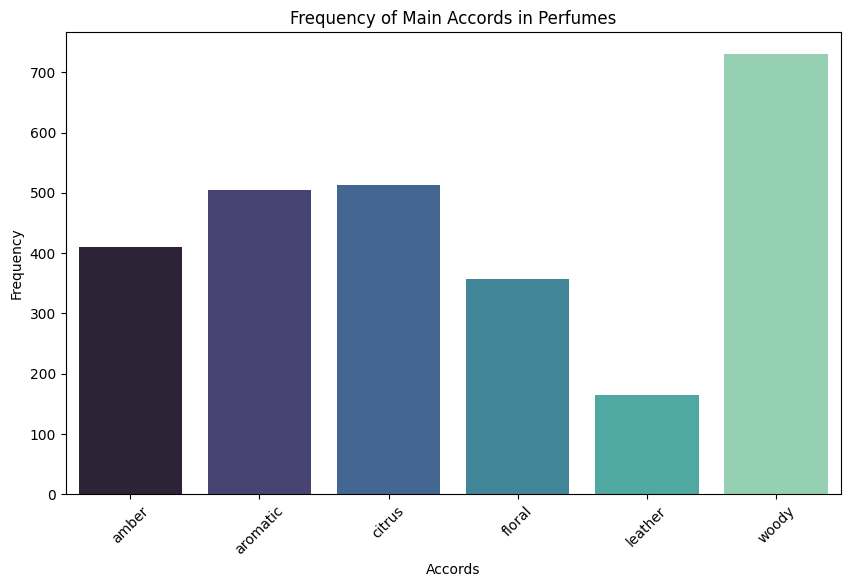

In [2]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 데이터셋 로드
df = pd.read_csv('../Data/preprocess-data/final_perfume-info.csv')

# 'main accords' 열에서 NaN 값을 가진 행을 제거하여 데이터 정제
cleaned_data = df.dropna(subset=['main accords'])

# 지정된 향의 빈도를 세는 함수 정의
def count_accords(df, accords):
    accord_counts = {accord: 0 for accord in accords}
    for accords_list in df['main accords']:
        try:
            # 문자열을 사전으로 변환
            accords_dict = json.loads(accords_list.replace("'", '"'))
            for accord in accords:
                if accord in accords_dict:
                    accord_counts[accord] += 1
        except json.JSONDecodeError:
            continue
    return accord_counts

# 계산할 주요 향의 목록을 정의
specified_accords = ["amber", "aromatic", "chypre", "citrus", "floral", "leather", "woody"]

# 정제된 데이터에서 지정된 향의 빈도를 계산
cleaned_accord_counts = count_accords(cleaned_data, specified_accords)

# 'Chypre' 향이 없는 경우 계산 결과에서 제거
if 'chypre' in cleaned_accord_counts:
    del cleaned_accord_counts['chypre']

# 주요 향의 빈도를 바 차트로 시각화
accords_names = list(cleaned_accord_counts.keys())
accords_values = list(cleaned_accord_counts.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=accords_names, y=accords_values, palette='mako')
plt.title('Frequency of Main Accords in Perfumes')
plt.xlabel('Accords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()